# Рабочая тетрадь №6 Мурдасов И.А. ИМБО-01-24

## Задание:

Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.(Вариант 5)

In [2]:
def qZ(x, y):
    return (x - 3 * y + 1) / 3 * x ** 2 + y ** 2 + 1

def qSumz(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

    return sortedId

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumz(arrZ), arrZ])

    return X, Y, results


X = [-2, -1, 0, 2]
Y = [-2, 0, -1, 1]

relults = evoSteps(X, Y)

for i in range(len(relults[2])):
    print(f"max_{i + 1}_step: {relults[2][i][2]}")

qualityArrz = []
for i in range(len(relults[2])):
    qualityArrz += relults[2][i][3]

print(f"max Z:     {max(qualityArrz)}")

max_1_step: 16.666666666666668
max_2_step: 23.333333333333332
max_3_step: 43.66666666666667
max_4_step: 55.66666666666667
max Z:     17.0


## Задание:

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

Лучший маршрут: [1, 5, 3, 4, 6, 2, 1]
Длина маршрута лучшего маршрута: 140
Длины всех рассмотренных маршрутов: [141, 128, 140, 166, 155]


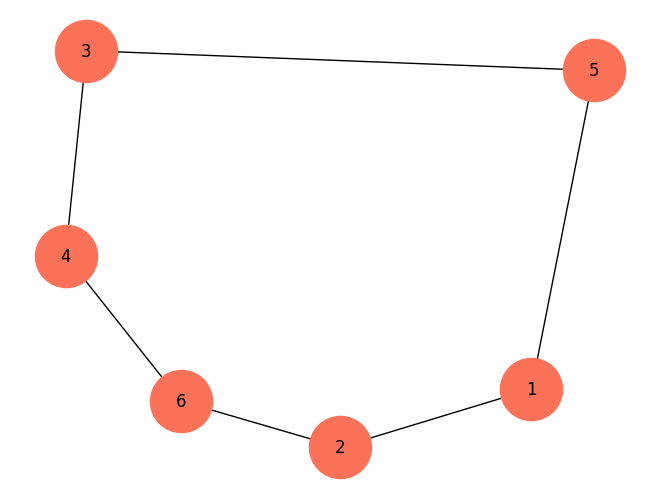

In [2]:
from math import e
import networkx as nx

distances = [(1, 2, 18),
              (1, 3, 41), 
              (1, 4, 36), 
              (1, 5, 29), 
              (1, 6, 19), 
              (2, 3, 27), 
              (2, 4, 31), 
              (2, 5, 37), 
              (2, 6, 15), 
              (3, 4, 19), 
              (3, 5, 42),
              (3, 6, 23),
              (4, 5, 24),
              (4, 6, 17),
              (5, 6, 24)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(2, 4),
     (3, 4),
     (4, 6),
     (5, 6)]
P = [63, 49, 45, 53]
T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    next = 0.5 * prevT

    return next

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[0] == j and item[1] == i) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(P)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)
    
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []

    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1]) or (distance[0] == bestRoute[i + 1] and distance[1] == bestRoute[i]):
                newDistances.append(distance)
    
    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color="#fb7258", node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f"Лучший маршрут: {bestRoute}")
print(f"Длина маршрута лучшего маршрута: {routeLength(bestRoute, distances)}")
print(f"Длины всех рассмотренных маршрутов: {arrLength}")

drawRouteGraph(distances, bestRoute)